In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns

lin_data=pd.DataFrame(data={'HorsePower' : [130, 250, 190, 300, 210, 220, 170], 'TotalWeight' : [1900, 2600, 2200, 2900, 2400, 2300, 2100], 'FuelEfficiency': [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]})
lin_data

,HorsePower,TotalWeight,FuelEfficiency
0,130,1900,16.3
1,250,2600,10.2
2,190,2200,11.1
3,300,2900,7.1
4,210,2400,12.1
5,220,2300,13.2
6,170,2100,14.2


In [17]:
x = lin_data[['HorsePower','TotalWeight']]
y = lin_data['FuelEfficiency']
print(x)
print(y)

   HorsePower  TotalWeight
0         130         1900
1         250         2600
2         190         2200
3         300         2900
4         210         2400
5         220         2300
6         170         2100
0    16.3
1    10.2
2    11.1
3     7.1
4    12.1
5    13.2
6    14.2
Name: FuelEfficiency, dtype: float64


In [18]:
lin_model = linear_model.LinearRegression()
lin_model.fit(x,y)

LinearRegression()

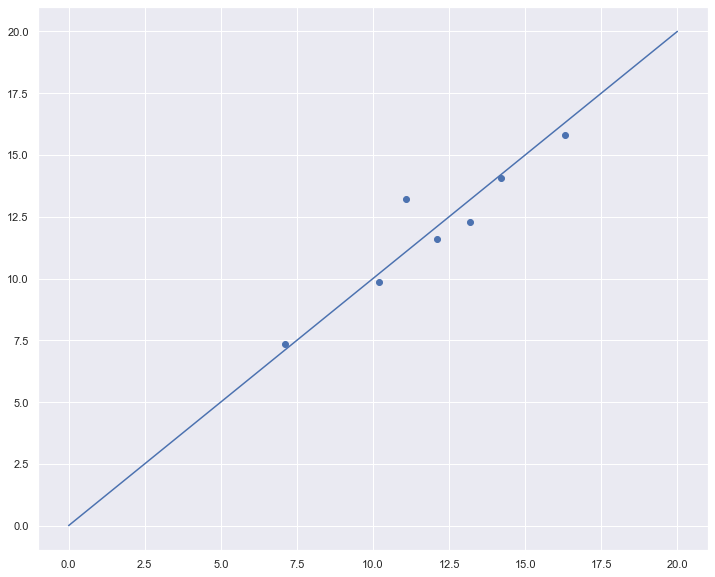

In [19]:
y_pred = lin_model.predict(x)
plt.scatter(y,y_pred)
xy_range = [0,20]
plt.plot(xy_range,xy_range)

### 1) 계수, 절편, 예측모델의 점수

In [20]:
print('계수 : {coefficient}'.format(coefficient=lin_model.coef_))
print('y 절편 : {y_intercept}'.format(y_intercept=lin_model.intercept_))
print('예측 점수 : {score}'.format(score=lin_model.score(x,y)))

계수 : [-0.00689189 -0.00731081]
y 절편 : 30.604054054054057
예측 점수 : 0.8871254041192391


### 2) 270마력 총중량 2,500KG의 자동차의 연비 예측

In [23]:
x_guess = [[270,2500]]
y_guess = lin_model.predict(x_guess)

print('{x} 마력 자동차의 예상 연비 : {y}'.format(x=x_guess,y=y_guess))

[[270, 2500]] 마력 자동차의 예상 연비 : [10.46621622]


C:\Users\Hanasaki\anaconda3\envs\main\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### 3) 상관관계 쌍플롯

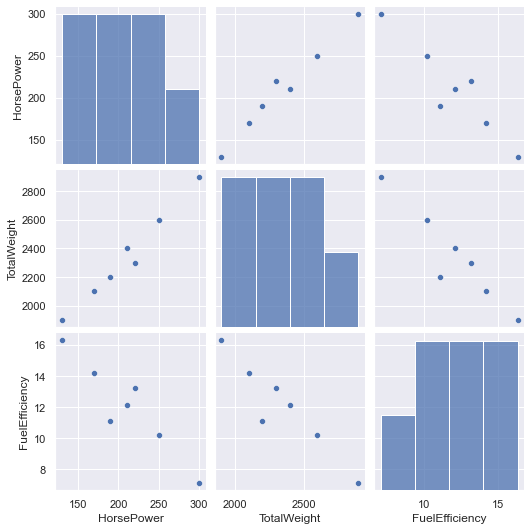

In [22]:
sns.pairplot(lin_data)

### 4) 상관관계 seaborn 히트맵

<AxesSubplot:>

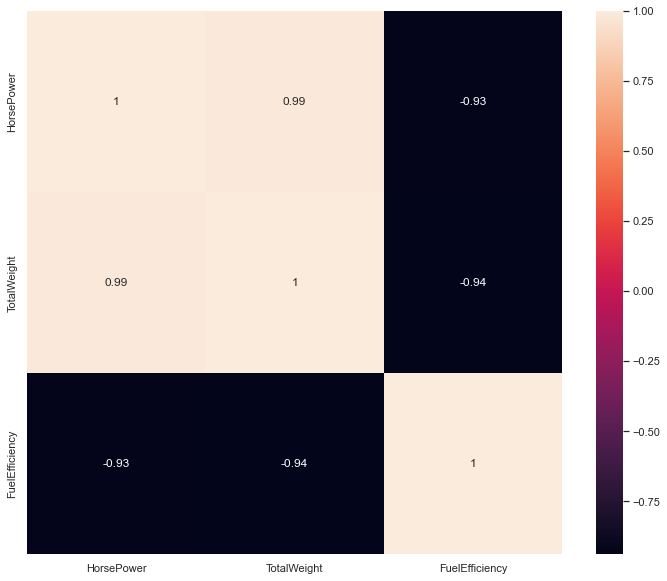

In [21]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = lin_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### 5) 마력, 총중량, 연비의 상관관계
1. 마력이 높을수록 무게는 더 무겁고, 연비는 나쁘다.
2. 무게가 무거울수록 마력이 높고, 연비는 나쁘다.
3. 연비가 좋을수록 무게는 가볍고, 마력도 낮다.